In [13]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col = 0)

df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [15]:
df_numeric = df.select_dtypes(include = [np.number]).columns.to_list()
df_numeric

['density',
 'agricultural_land',
 'land_area',
 'armed_forces_size',
 'birth_rate',
 'calling_code',
 'co2-emissions',
 'cpi',
 'cpi_change',
 'fertility_rate',
 'forested_area',
 'gasoline_price',
 'gdp',
 'gross_primary_education_enrollment',
 'gross_tertiary_education_enrollment',
 'infant_mortality',
 'life_expectancy',
 'maternal_mortality_ratio',
 'minimum_wage',
 'out_of_pocket_health_expenditure',
 'physicians_per_thousand',
 'population',
 'population_labor_force_participation',
 'tax_revenue',
 'total_tax_rate',
 'unemployment_rate',
 'urban_population',
 'latitude',
 'longitude']

In [16]:
media = df[df_numeric].mean()
media


density                                 1.345045e+02
agricultural_land                       3.911755e+01
land_area                               2.552127e+02
armed_forces_size                       1.037831e+02
birth_rate                              2.021497e+01
calling_code                            3.605464e+02
co2-emissions                           1.259155e+02
cpi                                     1.441936e+02
cpi_change                              6.722346e+00
fertility_rate                          2.698138e+00
forested_area                           3.201543e+01
gasoline_price                          1.002457e+00
gdp                                     4.772959e+11
gross_primary_education_enrollment      1.024702e+02
gross_tertiary_education_enrollment     3.796339e+01
infant_mortality                        2.133280e+01
life_expectancy                         7.227968e+01
maternal_mortality_ratio                1.603923e+02
minimum_wage                            2.1941

In [17]:
mediana = df[df_numeric].median()
mediana

density                                 8.300000e+01
agricultural_land                       3.960000e+01
land_area                               1.484600e+02
armed_forces_size                       2.850000e+01
birth_rate                              1.795000e+01
calling_code                            2.555000e+02
co2-emissions                           3.447700e+01
cpi                                     1.247400e+02
cpi_change                              2.300000e+00
fertility_rate                          2.245000e+00
forested_area                           3.200000e+01
gasoline_price                          9.800000e-01
gdp                                     3.438723e+10
gross_primary_education_enrollment      1.025500e+02
gross_tertiary_education_enrollment     3.120000e+01
infant_mortality                        1.400000e+01
life_expectancy                         7.320000e+01
maternal_mortality_ratio                5.300000e+01
minimum_wage                            1.0450

In [18]:
desviacion_estandar = df[df_numeric].std()   

print(f"Desviación estándar:\n {desviacion_estandar}")

Desviación estándar:
 density                                 1.573068e+02
agricultural_land                       2.178305e+01
land_area                               2.583850e+02
armed_forces_size                       1.671580e+02
birth_rate                              9.945774e+00
calling_code                            3.232364e+02
co2-emissions                           1.817949e+02
cpi                                     5.478400e+01
cpi_change                              2.445041e+01
fertility_rate                          1.282267e+00
forested_area                           2.379133e+01
gasoline_price                          3.688585e-01
gdp                                     2.172173e+12
gross_primary_education_enrollment      1.315161e+01
gross_tertiary_education_enrollment     2.926102e+01
infant_mortality                        1.954806e+01
life_expectancy                         7.483661e+00
maternal_mortality_ratio                2.335020e+02
minimum_wage            

In [19]:
max= df[df_numeric].max()
print(f"Valor máximo:\n {max}")
min= df[df_numeric].min()
print(f"Valor mínimo:\n {min}")

Valor máximo:
 density                                 8.470000e+02
agricultural_land                       8.260000e+01
land_area                               9.640000e+02
armed_forces_size                       9.360000e+02
birth_rate                              4.608000e+01
calling_code                            1.876000e+03
co2-emissions                           7.279730e+02
cpi                                     5.509300e+02
cpi_change                              2.549000e+02
fertility_rate                          6.910000e+00
forested_area                           9.830000e+01
gasoline_price                          2.000000e+00
gdp                                     2.142770e+13
gross_primary_education_enrollment      1.425000e+02
gross_tertiary_education_enrollment     1.366000e+02
infant_mortality                        8.450000e+01
life_expectancy                         8.540000e+01
maternal_mortality_ratio                1.150000e+03
minimum_wage                   

In [24]:
#2: Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.
max_densidad = df.sort_values(by='density', ascending=False).head(1)
df_densidad= max_densidad[["country", "density"]]
df_densidad

,country,density
133,Palestinian National Authority,847.0


In [25]:
min_population = df.sort_values(by='population', ascending=True).head(1)
df_population= min_population[["country", "population"]]
df_population


,country,population
120,Nauru,10.084


In [26]:
#3: Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.
tasa_natalidad = df["birth_rate"].mean()
tasa_natalidad




np.float64(20.214973544973546)

In [44]:
Q1 = np.percentile(df['infant_mortality'].dropna(), 25)
Q2 = np.percentile(df['infant_mortality'].dropna(), 50)
Q3 = np.percentile(df['infant_mortality'].dropna(), 75)


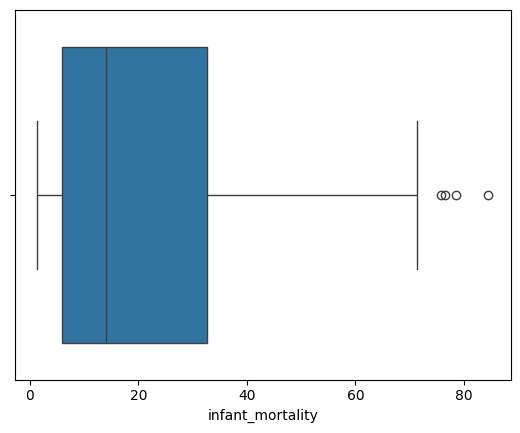

In [45]:
#4: Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.
# Para ello, calcula los cuartiles y define los límites de cada categoría.
# Crea una nueva columna en el DataFrame original que contenga la clasificación de la mortalidad infantil.
# Finalmente, genera un gráfico de barras que muestre la cantidad de países en cada categoría.
sns.boxplot(x = df["infant_mortality"]);
plt.show()

In [42]:
percentiles = np.percentile(df["infant_mortality"].dropna(), [25, 50, 75])
percentiles
print(f'percentil 25: {percentiles[0]}')
print(f'percentil 50: {percentiles[1]}')
print(f'percentil 75: {percentiles[2]}')


percentil 25: 6.0
percentil 50: 14.0
percentil 75: 32.7


In [49]:
def clasificar(value) :
    if value < Q1: 
        return "bajo"
    elif Q1<= value <= Q3: 
        return "medio"
    else:
        return "alto"
df['clasification']= df['infant_mortality'].apply(clasificar)
df.head()




,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,clasification
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia,alto
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe,medio
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa,medio
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe,bajo
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa,alto


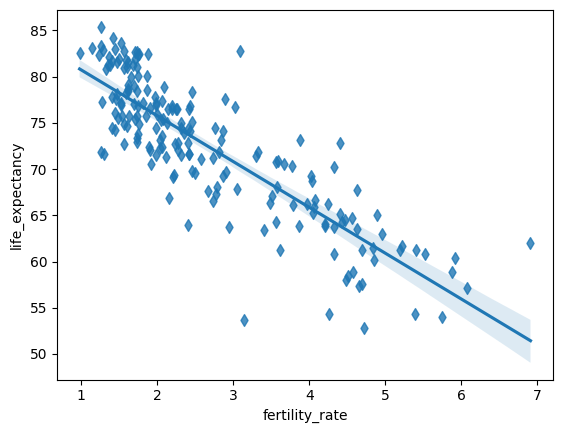

In [50]:
#5: Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

sns.regplot(x="fertility_rate", y= "life_expectancy", data=df, marker="d");


In [5]:
df_correlacion= df[["fertility_rate","life_expectancy"]]


NameError: name 'df' is not defined

In [ ]:
matriz_correlacion = df[df_numeric].corr(method='spearman')
df_numeric = df.select_dtypes(include = [np.number]).columns.to_list()
matriz_correlacion = df[df_numeric].corr()
matriz_correlacion